In [1]:
import random
import copy
import logging
import sys
import os
import sys
import importlib
import numpy as np
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
from tools_pattern import get_eucledean_dist
import compress_pickle
import my_plot
from my_plot import MyPlotData, my_box_plot
import seaborn as sns

script_n = 'plot_210614_2b_ref_delta'

data_script = 'batch_210614_stability_vs_redundancy_2b'
db_path = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/' \
            f'{data_script}/'

n_mfs = 488
n_grcs = 1459
pattern_type = 'binary'
db = {}
direction = '1'
noise = '0.25'

model = 'shuffle'
db[model] = compress_pickle.load(
    db_path+f'{data_script}_{model}_{pattern_type}_{n_grcs}_{n_mfs}_dir_{direction}_noise_{noise}_0.3_256_40.gz')

model = 'global_random'
db[model] = compress_pickle.load(
    db_path+f'{data_script}_{model}_{pattern_type}_{n_grcs}_{n_mfs}_dir_{direction}_noise_{noise}_0.3_256_40.gz')

def get_average_delta(hist_sum, ref_sum):
    return sum(hist_sum)/len(hist_sum) - ref_sum

def get_signal_variance(hist_sum):
    return np.std(hist_sum, ddof=1)

def get_low_signal_val(hist_sum, pct=.025):
    return sorted(hist_sum, reverse=False)[int(len(hist_sum)*pct)]

def get_signal_variance_width(hist_sum):
    hist_sum = sorted(hist_sum)
    return hist_sum[int(.95*len(hist_sum))] - hist_sum[int(.05*len(hist_sum))]

def get_signal_loss(hist_sum, ref_sum):
    hist_sum = sorted(hist_sum)
    return ref_sum- hist_sum[int(.5*len(hist_sum))]
        


# avg_grc_dim_list = defaultdict(list)
# for ress in db['random']:
#     ress_tries = ress
#     for ress in ress_tries:
# #         print(ress)
#         for noise in ress:
#             res = ress[noise]
#             grc_dim = res['grc_dim']
#             avg_grc_dim_list[noise].append(grc_dim)

# avg_grc_dim = {}
# for noise in avg_grc_dim_list:
#     avg_grc_dim[noise] = sum(avg_grc_dim_list[noise])/len(avg_grc_dim_list[noise])

In [2]:

name_map = {
        'scaleup4': "Observed",
        'global_random': "Global Random",
        'random': "Global Random",
#         'naive_random_17': "Local Random",
        'shuffle': "Shuffle",
}

palette = {
    name_map['scaleup4']: sns.color_palette()[0],
    name_map['global_random']: sns.color_palette()[1],
    name_map['random']: sns.color_palette()[1],
    name_map['shuffle']: sns.color_palette()[2],
#     name_map['naive_random_21']: sns.color_palette()[2],
}


mpd = MyPlotData()
ress_ref = db['shuffle'][0][0]
resss_ref2 = db['shuffle'][0]
for model_name in [
        'shuffle',
        'global_random',
        ]:
    ress = db[model_name]
    ress_tries = ress[0]  # get the first element in tuple
    for n_try, ress in enumerate(ress_tries):
        if n_try >= len(resss_ref2):
            print(n_try)
            continue
        ress_ref2 = resss_ref2[n_try]
        for noise in ress:
            res = ress[noise]
            res_ref2 = ress_ref2[noise]
            mpd.add_data_point(
                model=name_map[model_name],
                avg_delta=get_average_delta(res['hist_sum'], res['ref_sum0']),
                ref_delta=res['ref_delta'],
                variance=get_signal_variance(res['hist_sum']),
                low_signal=get_low_signal_val(res['hist_sum']),
                variance_width=get_signal_variance_width(res['hist_sum']),
                signal_loss=get_signal_loss(res['hist_sum'], res['ref_sum1']),
                noise=noise,
                )

In [3]:
print(res['ref_sum0'])
print(res['ref_sum1'])
print(res['ref_delta'])
print(res['hist_sum'])

308
304
-4
[287, 304, 306, 277, 290, 278, 283, 311, 289, 287, 310, 284, 278, 280, 287, 292, 319, 312, 300, 273, 270, 303, 290, 299, 295, 301, 305, 286, 291, 279, 300, 280, 289, 310, 282, 283, 292, 304, 290, 297, 287, 306, 287, 296, 299, 294, 296, 277, 292, 294, 296, 277, 262, 305, 292, 290, 281, 283, 307, 261, 296, 288, 281, 271, 304, 286, 286, 295, 298, 293, 264, 261, 272, 265, 282, 286, 281, 289, 299, 300, 261, 276, 281, 289, 293, 285, 287, 289, 295, 319, 278, 302, 300, 286, 312, 278, 285, 314, 295, 303, 295, 316, 304, 300, 289, 274, 280, 289, 281, 275, 289, 290, 287, 275, 298, 292, 274, 283, 309, 279, 287, 294, 267, 303, 279, 290, 291, 307, 294, 314, 306, 273, 290, 278, 296, 282, 292, 266, 299, 291, 295, 301, 287, 293, 287, 297, 292, 328, 292, 321, 273, 272, 298, 301, 288, 252, 300, 295, 276, 311, 305, 295, 317, 285, 275, 285, 317, 285, 307, 304, 302, 276, 292, 297, 280, 303, 292, 285, 298, 296, 304, 300, 292, 299, 296, 295, 300, 281, 299, 278, 280, 279, 294, 287, 295, 276, 303, 302

Height: 7.518796992481203, Aspect: 1.33


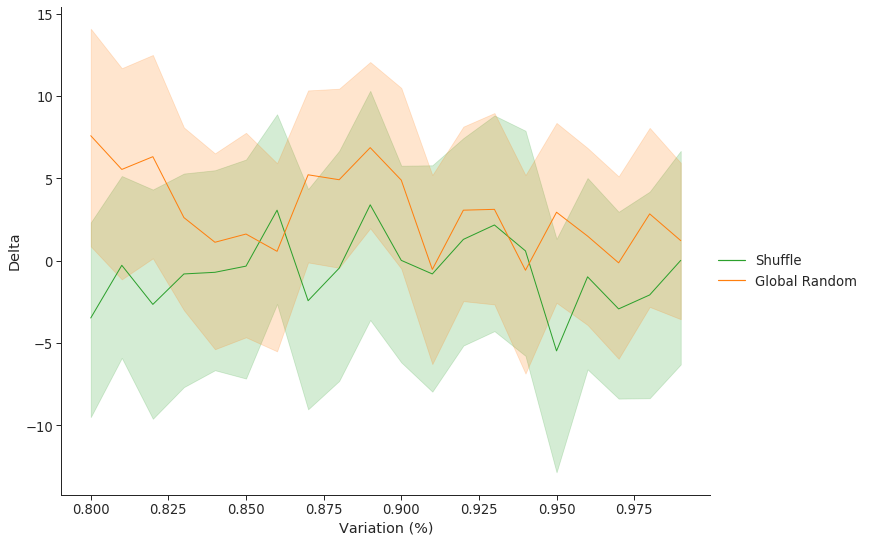

In [4]:

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='noise',
    y='ref_delta',
    hue='model',
    context='paper',
    palette=palette,
    linewidth=1,
    width=10,
#     ylim=[0, None],
#     xlim=[0, 150],
    y_axis_label='Delta',
    x_axis_label='Variation (%)',
    save_filename=f'{script_n}.svg',
    show=True,
    )
